In [9]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

**Simple linear regression** y = ax + b

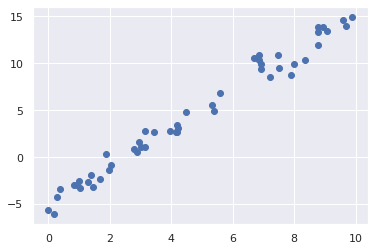

In [10]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(50)
y = 2 * X - 5 + rng.randn(50)
plt.scatter(X, y)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X[:, np.newaxis], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

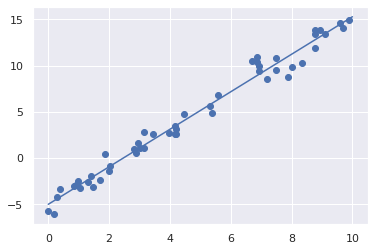

In [12]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(xfit, yfit)

In [13]:
print("Slope ", model.coef_)
print("Intercept", model.intercept_)

Slope  [2.02720881]
Intercept -4.998577085553202


In [14]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2, 1])

model.fit(X, y)
print(model.coef_)
print(model.intercept_)


[ 1.5 -2.   1. ]
0.5000000000000127


In [15]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly = poly.fit_transform(X[:, None])
poly

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())
poly_model

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=7, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

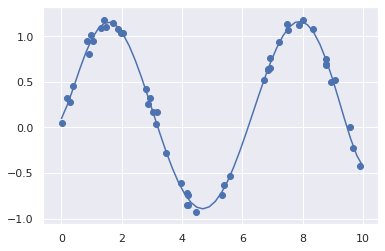

In [17]:
#sine with noise
rng = np.random.RandomState(1)
X = 10 * rng.rand(50)
y = np.sin(X) + 0.21 * rng.rand(50)

xfit = np.linspace(0, 10, 50)
poly_model.fit(X[:, None], y)
yfit = poly_model.predict(xfit[:, None])

plt.plot(xfit, yfit)
plt.scatter(X, y)

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaces Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, 
                                 self.width_, axis=1)
    

(0, 10)

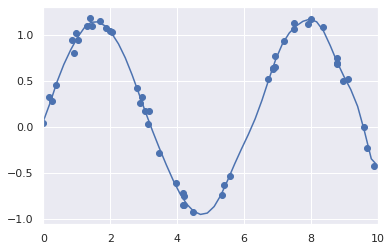

In [61]:
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())

gauss_model.fit(X[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

(-1.5, 1.5)

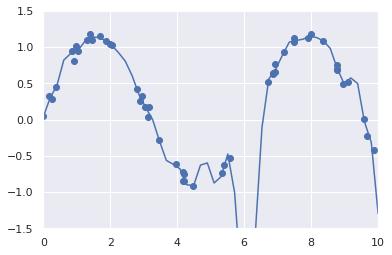

In [60]:
gauss_model = make_pipeline(GaussianFeatures(30),
                            LinearRegression())

gauss_model.fit(X[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

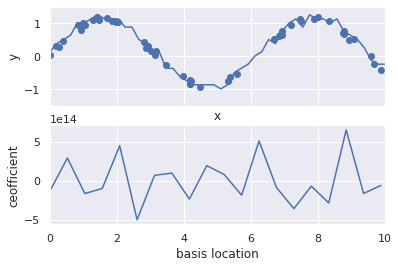

In [41]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(X[:, np.newaxis], y)
    ax[0].scatter(X, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel="x", ylabel="y", ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
        
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel="basis location", ylabel="ceofficient", xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(20, width_factor=50),
                            LinearRegression())
basis_plot(model)

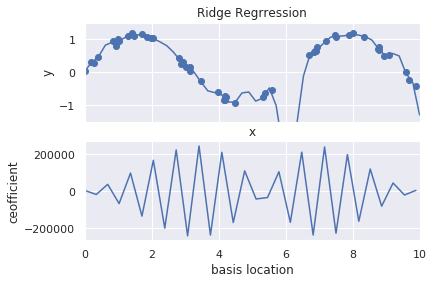

In [43]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model, title="Linear Regression")

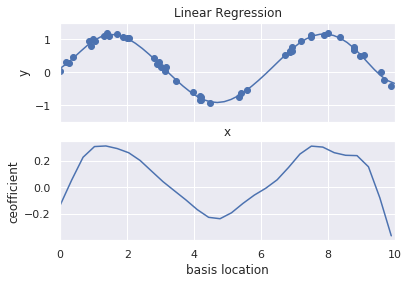

In [57]:
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title="Linear Regression")

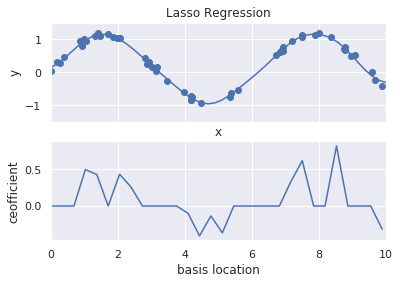

In [65]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title="Lasso Regression")